In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('TATASTEEL-PE.csv')

In [3]:
df.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,TATASTEEL,01-Dec-2023,28-Dec-2023,PE,100.0,0.05,0.10,0.05,0.1,0.10,0.05,7.00,38.53,0.03,335500.00,27500.00,130.0
1,TATASTEEL,01-Dec-2023,28-Dec-2023,PE,101.0,-,-,-,0.2,0.20,0.05,-,-,-,16500.00,-,130.0
2,TATASTEEL,01-Dec-2023,28-Dec-2023,PE,102.0,-,-,-,0.9,-,0.05,-,-,-,-,-,130.0
3,TATASTEEL,01-Dec-2023,28-Dec-2023,PE,103.0,-,-,-,1.0,-,0.05,-,-,-,-,-,130.0
4,TATASTEEL,01-Dec-2023,28-Dec-2023,PE,104.0,-,-,-,1.1,-,0.05,-,-,-,-,-,130.0


In [4]:
df.tail()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
1031,TATASTEEL,27-Dec-2023,28-Dec-2023,PE,156.0,-,-,-,28.30,-,18.75,-,-,-,-,-,137.2
1032,TATASTEEL,27-Dec-2023,28-Dec-2023,PE,157.0,-,-,-,29.15,-,19.75,-,-,-,-,-,137.2
1033,TATASTEEL,27-Dec-2023,28-Dec-2023,PE,97.0,-,-,-,0.45,-,0.05,-,-,-,-,-,137.2
1034,TATASTEEL,27-Dec-2023,28-Dec-2023,PE,98.0,-,-,-,0.55,-,0.05,-,-,-,-,-,137.2
1035,TATASTEEL,27-Dec-2023,28-Dec-2023,PE,99.0,-,-,-,0.60,-,0.05,-,-,-,-,-,137.2


In [5]:
df.index

RangeIndex(start=0, stop=1036, step=1)

In [6]:
df.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

In [7]:
df.replace(to_replace='-',value=0,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Symbol                            1036 non-null   object 
 1   Date                              1036 non-null   object 
 2   Expiry                            1036 non-null   object 
 3   Option type                       1036 non-null   object 
 4   Strike Price                      1036 non-null   float64
 5   Open                              1036 non-null   object 
 6   High                              1036 non-null   object 
 7   Low                               1036 non-null   object 
 8   Close                             1036 non-null   float64
 9   LTP                               1036 non-null   object 
 10  Settle Price                      1036 non-null   float64
 11  No. of contracts                  1036 non-null   object 
 12  Turnov

In [9]:
# The datatype of some columns are unworkable in their present form

convert_dict = {'LTP  ':float,'No. of contracts  ':float}

df = df.astype(convert_dict)

In [10]:
df['Date  '] = pd.to_datetime(df['Date  '])
df['Expiry  ']= pd.to_datetime(df['Expiry  '])

In [11]:
# Dropping unnecessary columns

df1 = df.drop(labels=['Open  ', 'High  ', 'Low  ','Turnover * in  ₹ Lakhs','Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  '],axis=1)

In [12]:
df1.head()

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
0,TATASTEEL,2023-12-01,2023-12-28,PE,100.0,0.1,0.1,0.05,7.0,130.0
1,TATASTEEL,2023-12-01,2023-12-28,PE,101.0,0.2,0.2,0.05,0.0,130.0
2,TATASTEEL,2023-12-01,2023-12-28,PE,102.0,0.9,0.0,0.05,0.0,130.0
3,TATASTEEL,2023-12-01,2023-12-28,PE,103.0,1.0,0.0,0.05,0.0,130.0
4,TATASTEEL,2023-12-01,2023-12-28,PE,104.0,1.1,0.0,0.05,0.0,130.0


In [13]:
# Dropping rows with no contracts

df2 = df1[df1['No. of contracts  ']>0]

In [14]:
df2

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
0,TATASTEEL,2023-12-01,2023-12-28,PE,100.0,0.10,0.10,0.05,7.0,130.0
5,TATASTEEL,2023-12-01,2023-12-28,PE,105.0,0.10,0.10,0.10,2.0,130.0
10,TATASTEEL,2023-12-01,2023-12-28,PE,110.0,0.15,0.15,0.15,117.0,130.0
11,TATASTEEL,2023-12-01,2023-12-28,PE,111.0,0.15,0.15,0.05,3.0,130.0
13,TATASTEEL,2023-12-01,2023-12-28,PE,113.0,0.15,0.15,0.10,16.0,130.0
...,...,...,...,...,...,...,...,...,...,...
1020,TATASTEEL,2023-12-27,2023-12-28,PE,145.0,7.85,7.80,7.85,28.0,137.2
1021,TATASTEEL,2023-12-27,2023-12-28,PE,146.0,9.10,9.10,8.75,1.0,137.2
1023,TATASTEEL,2023-12-27,2023-12-28,PE,148.0,10.25,10.25,10.75,2.0,137.2
1024,TATASTEEL,2023-12-27,2023-12-28,PE,149.0,12.50,12.50,11.75,1.0,137.2


In [15]:
# Bifurcating data based on their moneyness

df_inmoney = df2[df2['Strike Price  ']-df2['Underlying Value  ']>0]

In [16]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
31,TATASTEEL,2023-12-01,2023-12-28,PE,131.0,3.45,3.45,3.45,251.0,130.0
32,TATASTEEL,2023-12-01,2023-12-28,PE,132.0,4.00,4.00,4.00,109.0,130.0
33,TATASTEEL,2023-12-01,2023-12-28,PE,133.0,4.60,4.60,4.60,23.0,130.0
34,TATASTEEL,2023-12-01,2023-12-28,PE,134.0,5.25,5.25,5.25,38.0,130.0
35,TATASTEEL,2023-12-01,2023-12-28,PE,135.0,5.95,6.00,5.95,199.0,130.0
...,...,...,...,...,...,...,...,...,...,...
1020,TATASTEEL,2023-12-27,2023-12-28,PE,145.0,7.85,7.80,7.85,28.0,137.2
1021,TATASTEEL,2023-12-27,2023-12-28,PE,146.0,9.10,9.10,8.75,1.0,137.2
1023,TATASTEEL,2023-12-27,2023-12-28,PE,148.0,10.25,10.25,10.75,2.0,137.2
1024,TATASTEEL,2023-12-27,2023-12-28,PE,149.0,12.50,12.50,11.75,1.0,137.2


In [17]:
df_inmoney = df_inmoney.reset_index(drop=True)

In [18]:
df_atmoney = df2[df2['Strike Price  ']-df2['Underlying Value  ']==0]
df_atmoney = df_atmoney.reset_index(drop=True)

In [19]:
df_outmoney = df2[df2['Strike Price  ']-df2['Underlying Value  ']<0]
df_outmoney = df_outmoney.reset_index(drop=True)

In [20]:
df_inmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              223 non-null    object        
 1   Date                223 non-null    datetime64[ns]
 2   Expiry              223 non-null    datetime64[ns]
 3   Option type         223 non-null    object        
 4   Strike Price        223 non-null    float64       
 5   Close               223 non-null    float64       
 6   LTP                 223 non-null    float64       
 7   Settle Price        223 non-null    float64       
 8   No. of contracts    223 non-null    float64       
 9   Underlying Value    223 non-null    float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 17.6+ KB


In [21]:
# There are 223 ITM put options

In [22]:
df_atmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              5 non-null      object        
 1   Date                5 non-null      datetime64[ns]
 2   Expiry              5 non-null      datetime64[ns]
 3   Option type         5 non-null      object        
 4   Strike Price        5 non-null      float64       
 5   Close               5 non-null      float64       
 6   LTP                 5 non-null      float64       
 7   Settle Price        5 non-null      float64       
 8   No. of contracts    5 non-null      float64       
 9   Underlying Value    5 non-null      float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 532.0+ bytes


In [23]:
# There are 5 ATM puts

In [24]:
df_outmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              427 non-null    object        
 1   Date                427 non-null    datetime64[ns]
 2   Expiry              427 non-null    datetime64[ns]
 3   Option type         427 non-null    object        
 4   Strike Price        427 non-null    float64       
 5   Close               427 non-null    float64       
 6   LTP                 427 non-null    float64       
 7   Settle Price        427 non-null    float64       
 8   No. of contracts    427 non-null    float64       
 9   Underlying Value    427 non-null    float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 33.5+ KB


In [25]:
# 227 OTM puts

In [26]:
# Code for Binomial Pricing Method

def binomial_crr(K,T,S0,r,N,sigma,opttype='P'):
    #precompute constants
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return round(C[0],2)

In [27]:
# Code for Black Scholes 

def blackScholes_put(r, S, K, T, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return round(price, 2)

In [28]:
df_inmoney['Maturity Time'] = (df_inmoney['Expiry  '] - df_inmoney['Date  ']).dt.days/365

df_atmoney['Maturity Time'] = (df_atmoney['Expiry  '] - df_atmoney['Date  ']).dt.days/365

df_outmoney['Maturity Time'] = (df_outmoney['Expiry  '] - df_outmoney['Date  ']).dt.days/365

In [29]:
# Historical Volatility
hist_vol = 0.2689

# Risk Free Rate 
risk_free = 0.07

# Number of time steps in Binomial Method
time_steps = 2

In [30]:
df_inmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],df_inmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'P')

df_inmoney['BSM Price'] = np.vectorize(blackScholes_put)(risk_free,df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],hist_vol)

In [31]:
df_atmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],df_atmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'P')

df_atmoney['BSM Price'] = np.vectorize(blackScholes_put)(risk_free,df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],hist_vol)

In [32]:
df_outmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],df_outmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'P')

df_outmoney['BSM Price'] = np.vectorize(blackScholes_put)(risk_free,df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],hist_vol)

In [33]:
# Monte Carlo Simulation

# Adapted from an implementation provided by OpenAI's ChatGPT language model,
# Specifically tailored for pricing European Put options using the Monte Carlo method.


def monte_carlo_put(S, K, T, r, sigma, num_simulations):
    dt = T / 365  # Time step (assuming 365 days in a year)
    np.random.seed(42)  # for reproducibility
    stock_prices = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        # Simulating stock price using geometric Brownian motion
        Z = np.random.normal(0, 1, 1)
        stock_price = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
        stock_prices[i] = stock_price
    
    # Calculate option payoff for put options
    put_payoffs = np.maximum(K - stock_prices, 0)
    
    # Discounting the expected payoff to present value
    put_price = np.exp(-r * T) * np.mean(put_payoffs)
    
    return round(put_price, 2)

In [34]:
# No. of simulations = 10000
sims = 10000

df_inmoney['MC Price'] = np.vectorize(monte_carlo_put)(df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_22408\1110072492.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [35]:
df_atmoney['MC Price'] = np.vectorize(monte_carlo_put)(df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_22408\1110072492.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [36]:
df_outmoney['MC Price'] = np.vectorize(monte_carlo_put)(df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_22408\1110072492.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [37]:
# Now, analysis of results

In [38]:
# 1. ITM Options

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

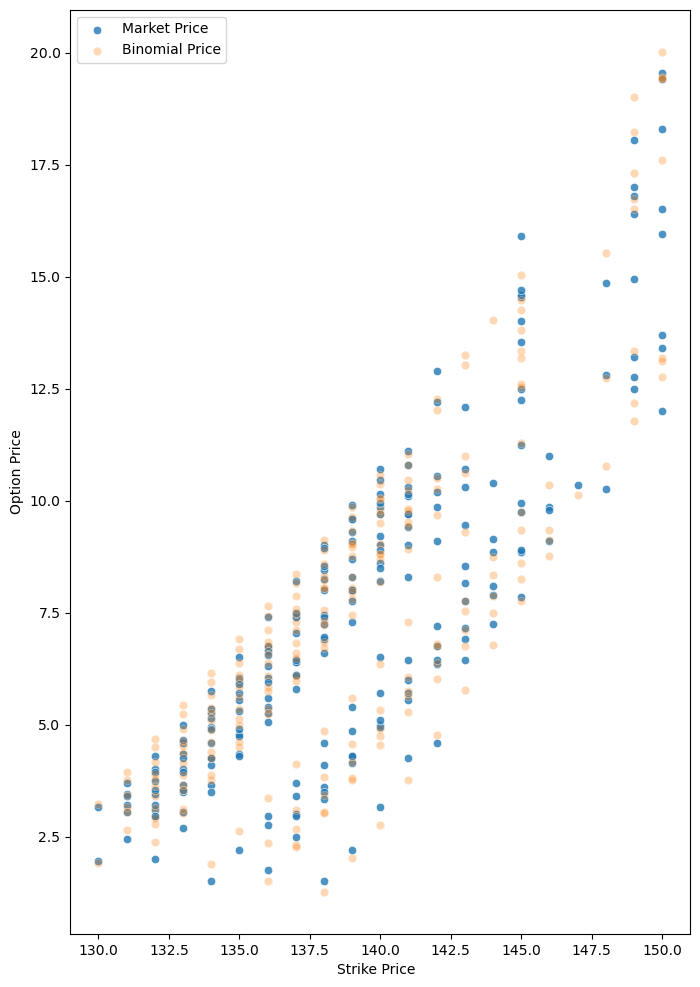

In [39]:
# Ploting Option Price vs Strike Price

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='Binomial Price', data=df_inmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

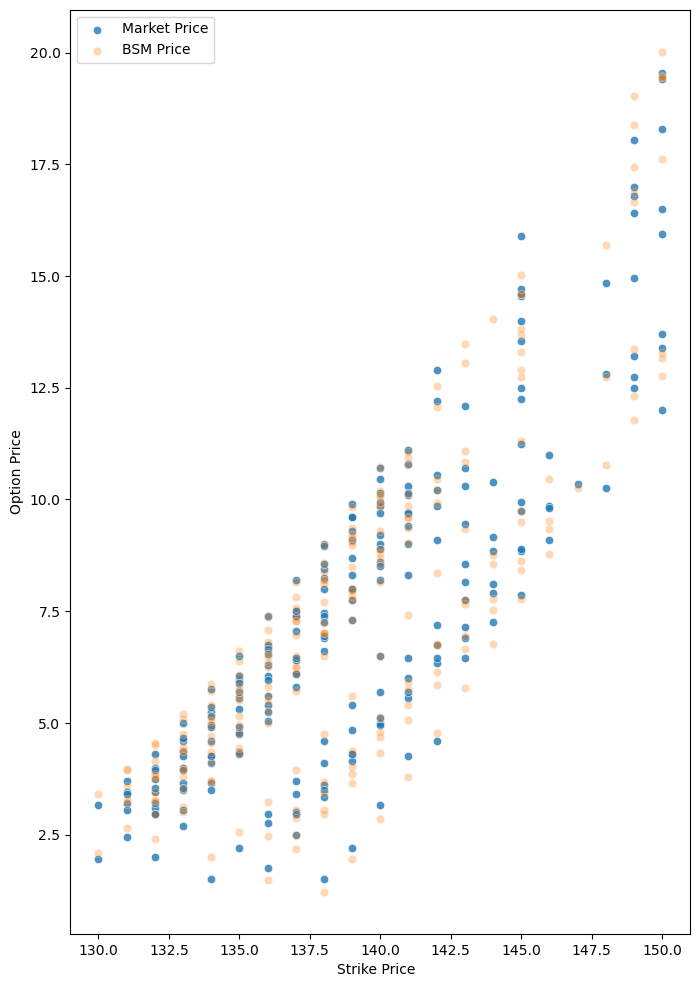

In [40]:
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BSM Price', data=df_inmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

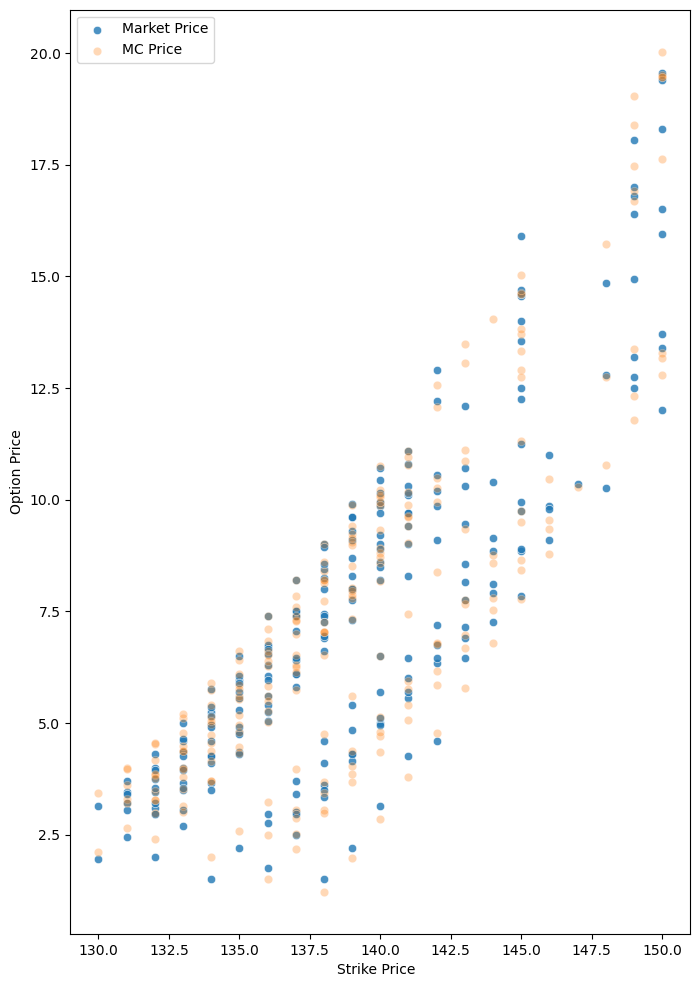

In [41]:
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='MC Price', data=df_inmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

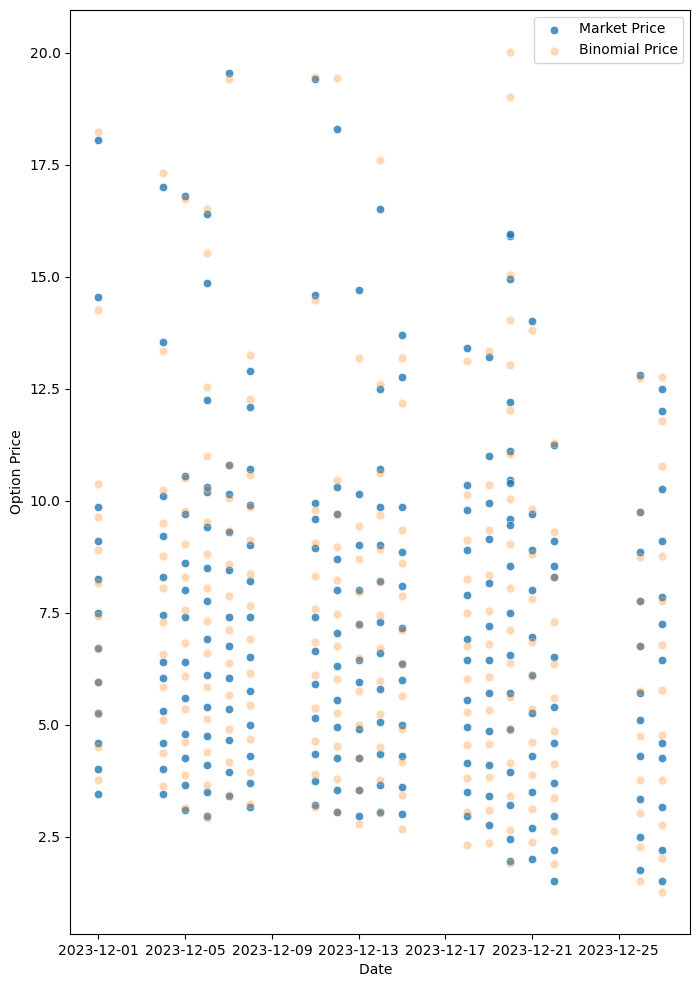

In [42]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_inmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

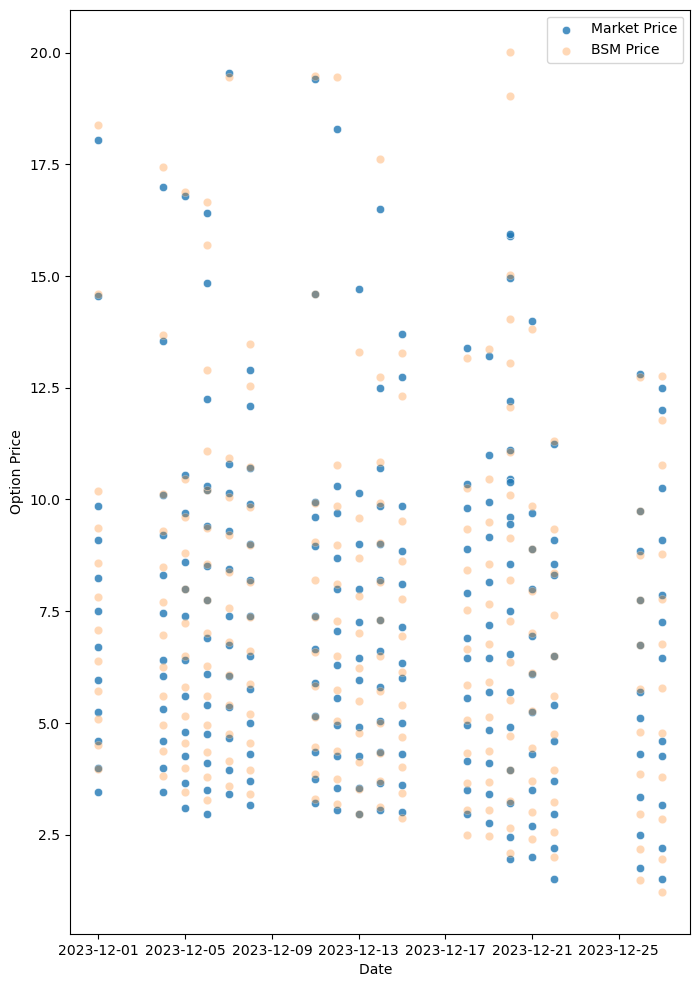

In [43]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='BSM Price', data=df_inmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

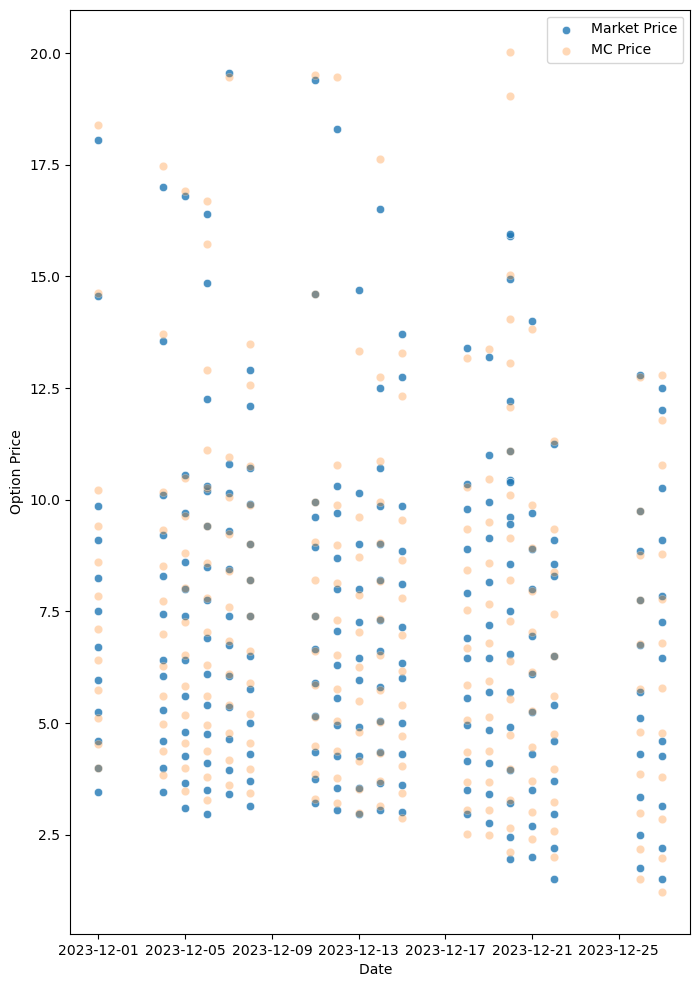

In [44]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='MC Price', data=df_inmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-Binomial)'>

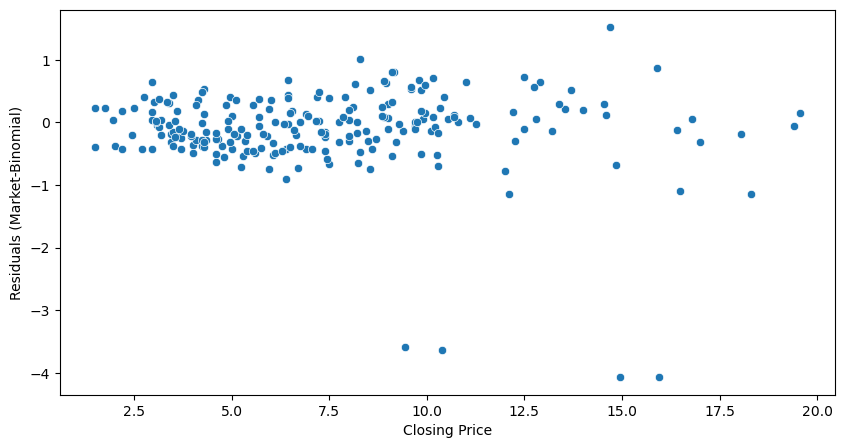

In [45]:
# Plotting Residuals

plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-Binomial)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['Binomial Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-BSM)'>

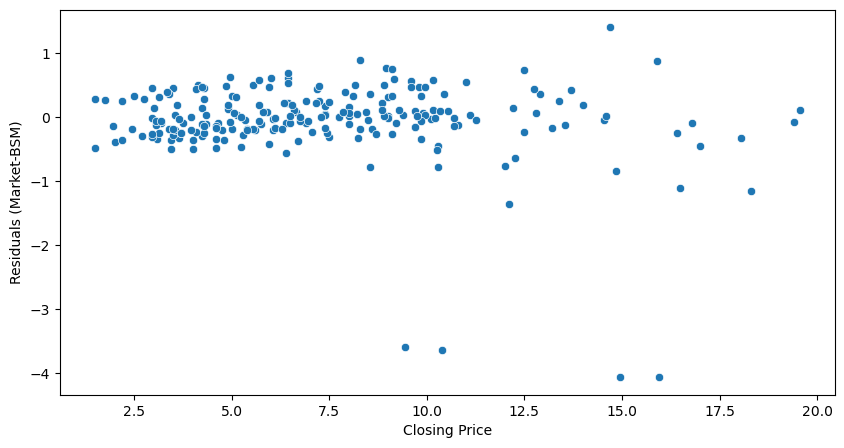

In [46]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-BSM)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['BSM Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-MC)'>

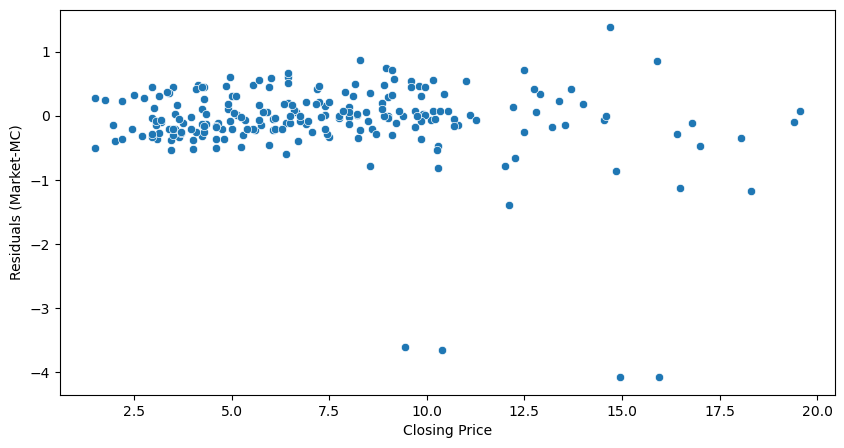

In [47]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-MC)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['MC Price'])

In [48]:
df_inmoney_binomial_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['Binomial Price'])
df_inmoney_binomial_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['Binomial Price'])
df_inmoney_binomial_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['Binomial Price']))

In [49]:
df_inmoney_bsm_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['BSM Price'])
df_inmoney_bsm_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['BSM Price'])
df_inmoney_bsm_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['BSM Price']))

In [50]:
df_inmoney_mc_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['MC Price'])
df_inmoney_mc_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['MC Price'])
df_inmoney_mc_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['MC Price']))

In [51]:
df_inmoney_error = pd.DataFrame({'MAE': [df_inmoney_binomial_mae, df_inmoney_bsm_mae, df_inmoney_mc_mae], 'MSE': [df_inmoney_binomial_mse,df_inmoney_bsm_mse, df_inmoney_mc_mse], 'RMSE': [df_inmoney_binomial_rmse,df_inmoney_bsm_rmse, df_inmoney_mc_rmse]},index=['Binomial','BSM','MC'])
df_inmoney_error                                                                                                                  

,MAE,MSE,RMSE
Binomial,0.382691,0.426368,0.652968
BSM,0.336368,0.396386,0.629592
MC,0.338475,0.398365,0.631162


In [52]:
# Now out of money options.

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

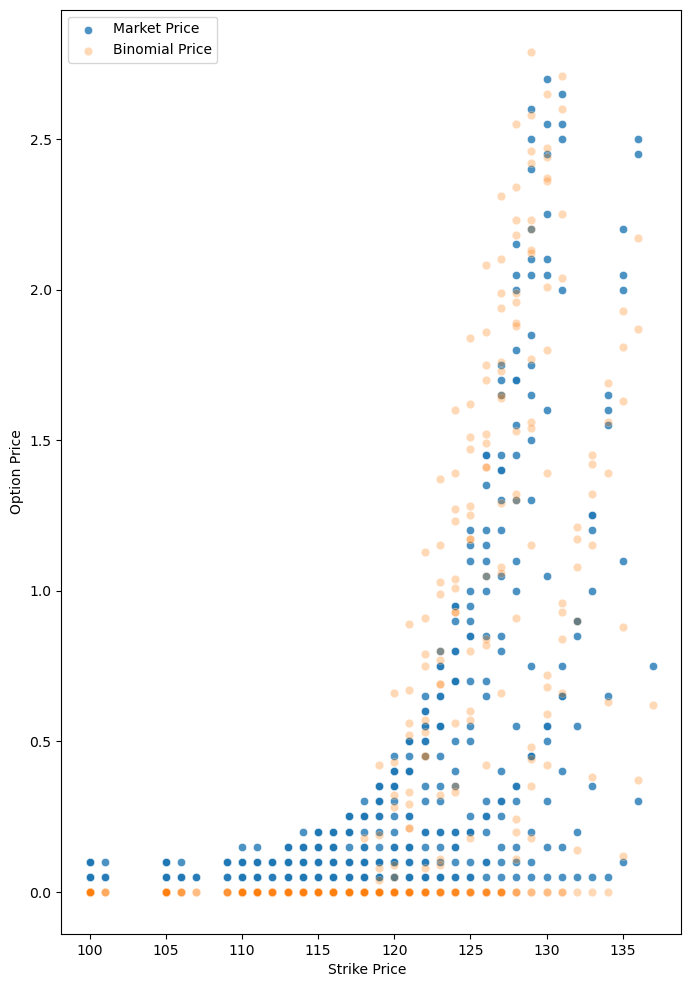

In [53]:
# Ploting Option Price vs Strike Price 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='Binomial Price', data=df_outmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

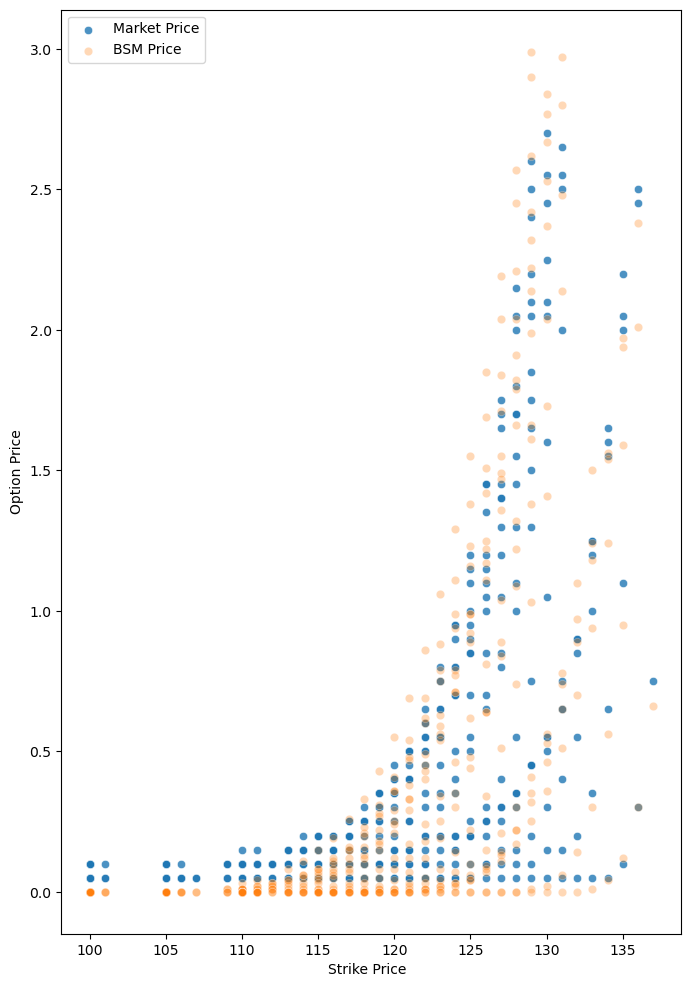

In [54]:
# Ploting Option Price vs Strike Price 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BSM Price', data=df_outmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

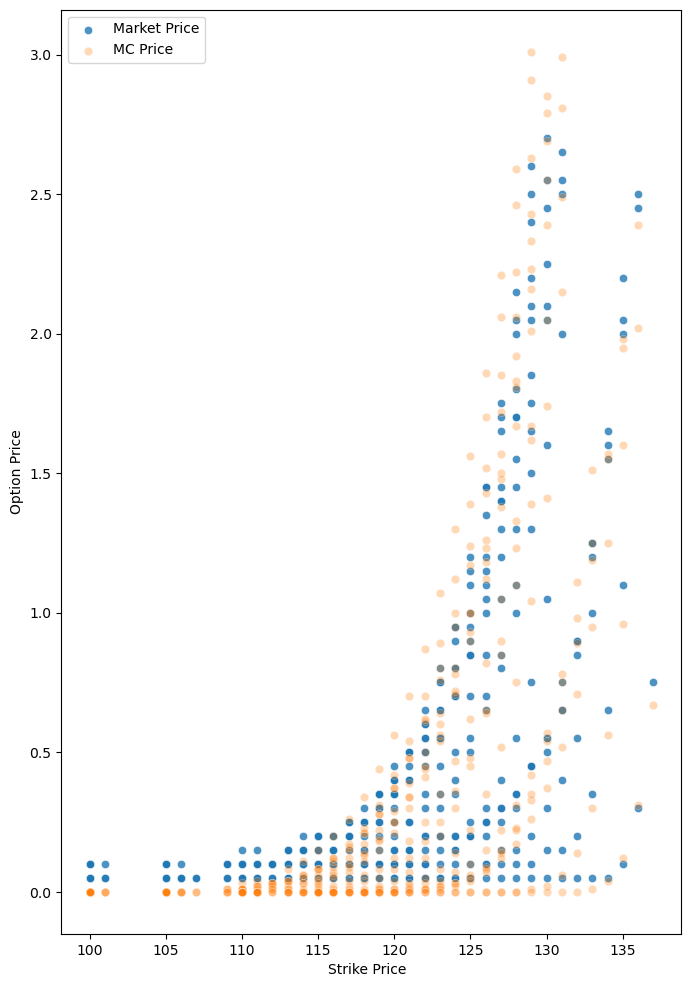

In [55]:
# Ploting Option Price vs Strike Price 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='MC Price', data=df_outmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

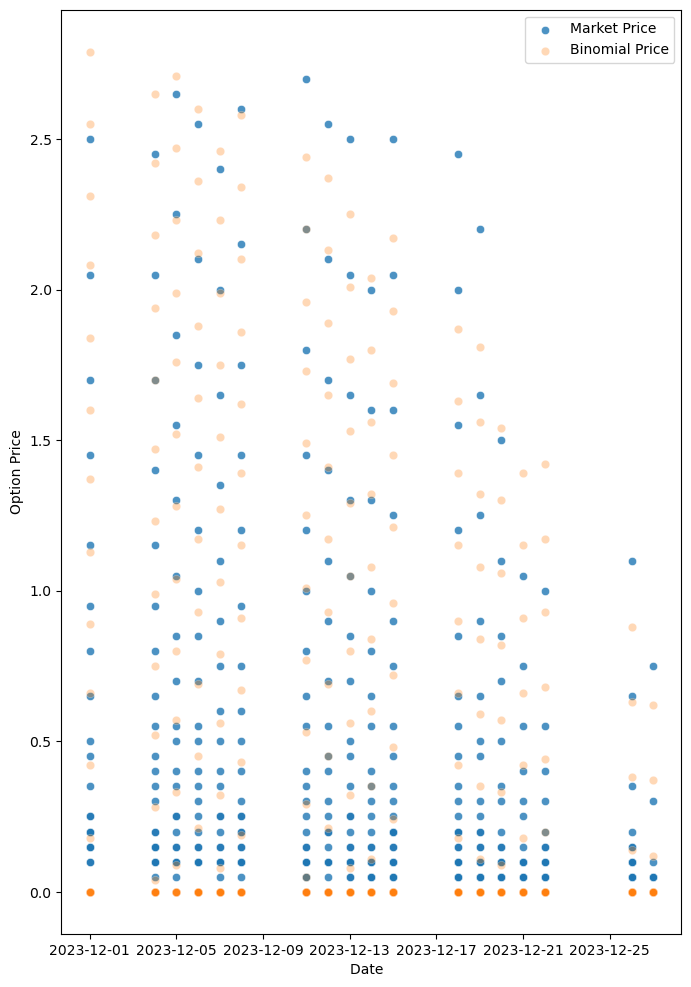

In [56]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_outmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

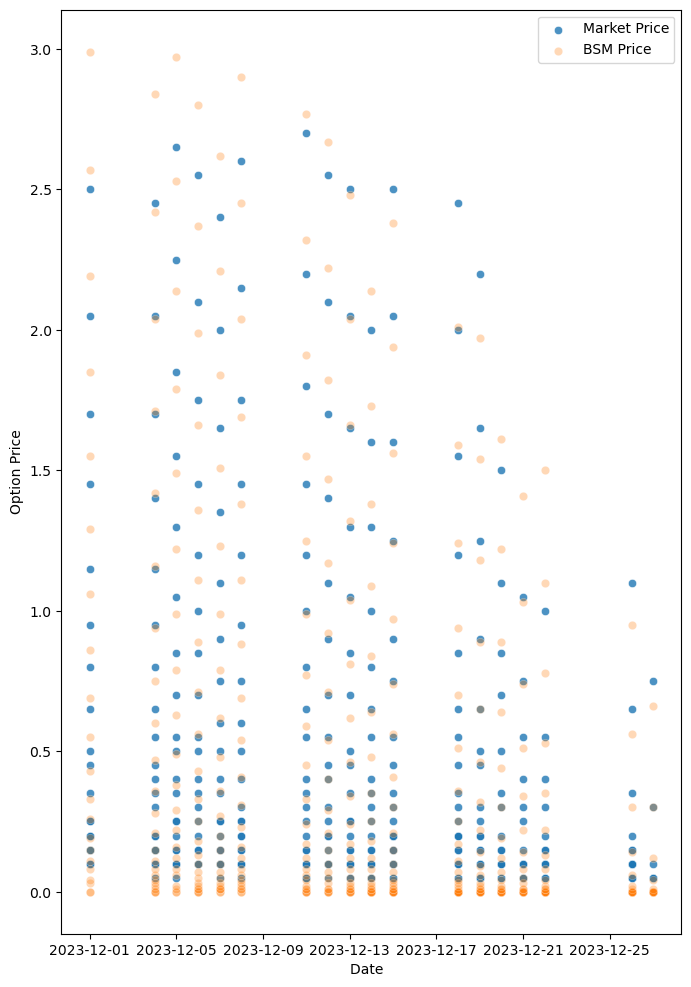

In [57]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='BSM Price', data=df_outmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

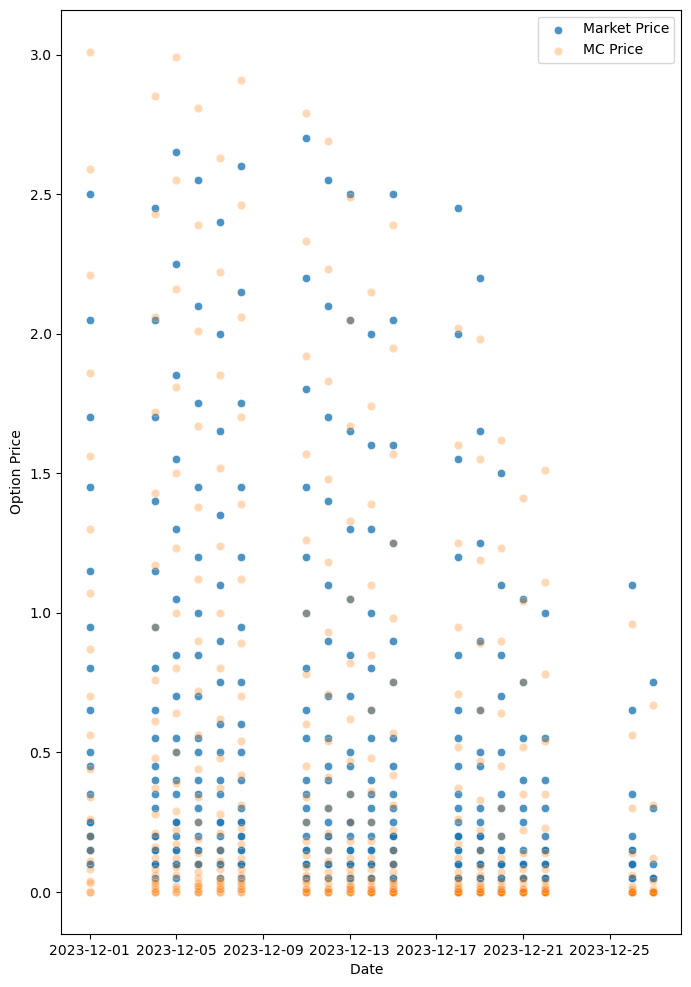

In [58]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='MC Price', data=df_outmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-Binomial)'>

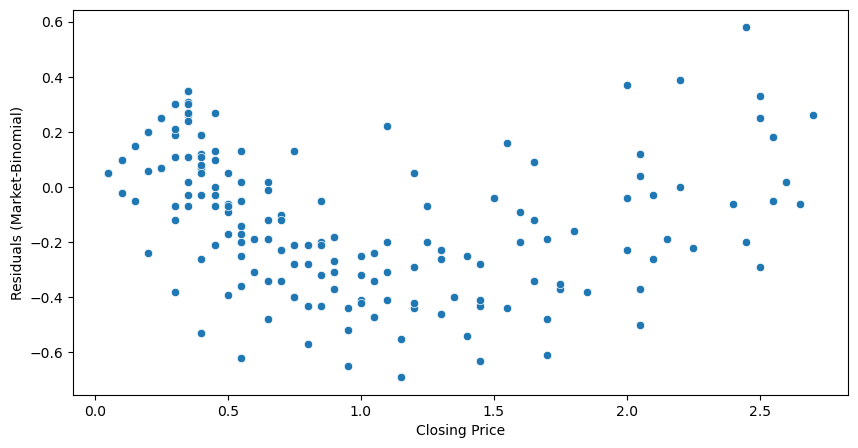

In [59]:
# Plotting Residuals

plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-Binomial)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['Binomial Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-BSM)'>

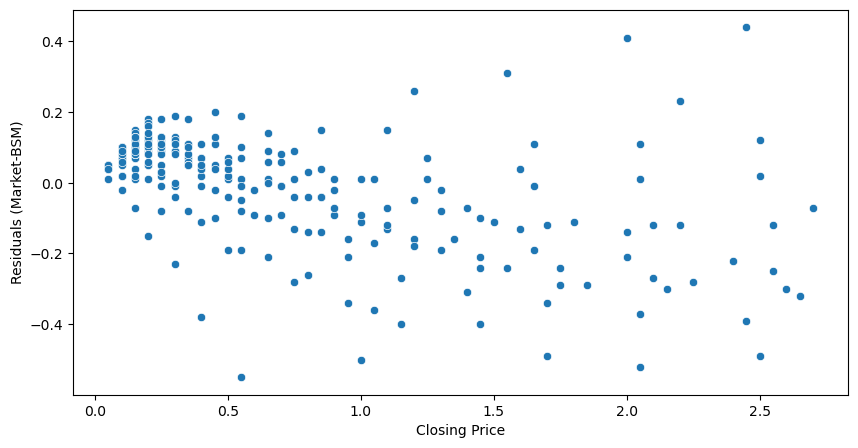

In [60]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-BSM)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['BSM Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-MC)'>

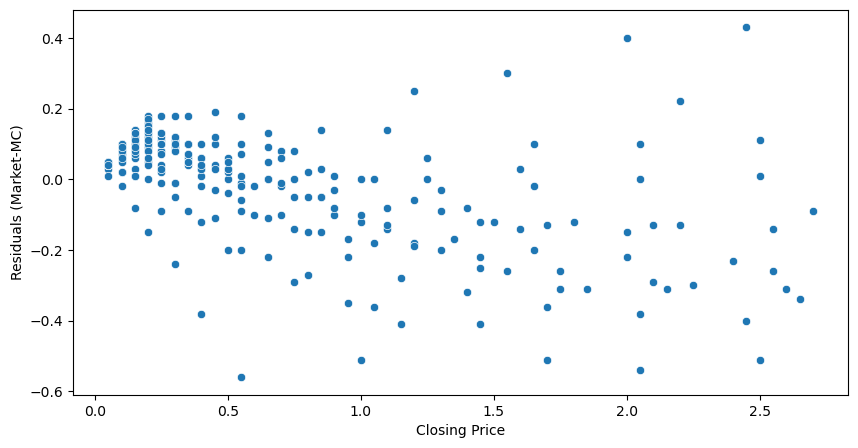

In [61]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')
plt.ylabel('Residuals (Market-MC)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['MC Price'])

In [62]:
df_outmoney_binomial_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['Binomial Price'])
df_outmoney_binomial_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['Binomial Price'])
df_outmoney_binomial_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['Binomial Price']))

In [63]:
df_outmoney_bsm_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['BSM Price'])
df_outmoney_bsm_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['BSM Price'])
df_outmoney_bsm_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['BSM Price']))

In [64]:
df_outmoney_mc_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['MC Price'])
df_outmoney_mc_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['MC Price'])
df_outmoney_mc_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['MC Price']))

In [65]:
df_outmoney_error = pd.DataFrame({'MAE': [df_outmoney_binomial_mae, df_outmoney_bsm_mae, df_outmoney_mc_mae], 'MSE': [df_outmoney_binomial_mse,df_outmoney_bsm_mse, df_outmoney_mc_mse], 'RMSE': [df_outmoney_binomial_rmse,df_outmoney_bsm_rmse, df_outmoney_mc_rmse]},index=['Binomial','BSM','MC'])
df_outmoney_error

,MAE,MSE,RMSE
Binomial,0.159321,0.041823,0.204507
BSM,0.100679,0.017402,0.131915
MC,0.101218,0.018012,0.134209


In [66]:
# Now at the money options

In [67]:
df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price
0,TATASTEEL,2023-12-01,2023-12-28,PE,130.0,2.95,2.95,2.95,1348.0,130.0,0.073973,3.02,3.46,3.47
1,TATASTEEL,2023-12-04,2023-12-28,PE,131.0,2.95,3.00,2.95,816.0,131.0,0.065753,2.89,3.30,3.32
2,TATASTEEL,2023-12-07,2023-12-28,PE,130.0,2.90,2.85,2.90,2086.0,130.0,0.057534,2.70,3.08,3.10
3,TATASTEEL,2023-12-14,2023-12-28,PE,132.0,2.45,2.35,2.45,1848.0,132.0,0.038356,2.28,2.60,2.61
4,TATASTEEL,2023-12-21,2023-12-28,PE,131.0,1.50,1.35,1.50,1222.0,131.0,0.019178,1.64,1.86,1.87


<Axes: xlabel='Date  ', ylabel='Option Price'>

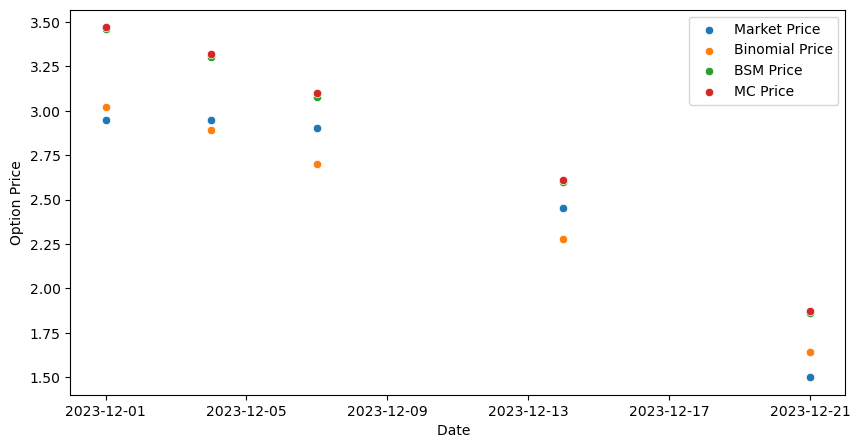

In [68]:
plt.figure(figsize=(10,5),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_atmoney, label='Market Price')
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_atmoney, label='Binomial Price')
sns.scatterplot(x='Date  ', y='BSM Price', data=df_atmoney, label='BSM Price')
sns.scatterplot(x='Date  ', y='MC Price', data=df_atmoney, label='MC Price')

In [69]:
# Calculating implied volatility

from scipy.optimize import brentq

def implied_volatility_call(market_price, S, K, T, r):
    def error_function(sigma, market_price, S, K, T, r):
        return blackScholes_put(r, S, K, T, sigma) - market_price
    
    # Using Brent's method to find the root (implied volatility)
    implied_volatility = brentq(error_function, -1, 5.0, args=(market_price, S, K, T, r), xtol=1e-6)
    return implied_volatility

In [70]:
def option_valuation (implied_volatility):
    if implied_volatility-hist_vol>0:
        return "Overvalued"
    elif implied_volatility-hist_vol<0:
        return "Undervalued"
    else:
        return "Par"

In [71]:
df_inmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_inmoney['Close  '],df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],risk_free)

df_inmoney['Valuation'] = df_inmoney['Implied Volatility'].apply(option_valuation)

df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,PE,131.0,3.45,3.45,3.45,251.0,130.0,0.073973,3.76,3.96,3.98,2.324999e-01,Undervalued
1,TATASTEEL,2023-12-01,2023-12-28,PE,132.0,4.00,4.00,4.00,109.0,130.0,0.073973,4.49,4.51,4.52,2.325799e-01,Undervalued
2,TATASTEEL,2023-12-01,2023-12-28,PE,133.0,4.60,4.60,4.60,23.0,130.0,0.073973,5.23,5.09,5.11,2.328195e-01,Undervalued
3,TATASTEEL,2023-12-01,2023-12-28,PE,134.0,5.25,5.25,5.25,38.0,130.0,0.073973,5.96,5.72,5.74,2.336908e-01,Undervalued
4,TATASTEEL,2023-12-01,2023-12-28,PE,135.0,5.95,6.00,5.95,199.0,130.0,0.073973,6.69,6.38,6.40,2.347574e-01,Undervalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,TATASTEEL,2023-12-27,2023-12-28,PE,145.0,7.85,7.80,7.85,28.0,137.2,0.002740,7.77,7.77,7.78,6.178369e-01,Overvalued
219,TATASTEEL,2023-12-27,2023-12-28,PE,146.0,9.10,9.10,8.75,1.0,137.2,0.002740,8.77,8.77,8.78,9.256238e-01,Overvalued
220,TATASTEEL,2023-12-27,2023-12-28,PE,148.0,10.25,10.25,10.75,2.0,137.2,0.002740,10.77,10.77,10.78,2.238736e-07,Undervalued
221,TATASTEEL,2023-12-27,2023-12-28,PE,149.0,12.50,12.50,11.75,1.0,137.2,0.002740,11.77,11.77,11.78,1.424582e+00,Overvalued


In [72]:
df_outmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_outmoney['Close  '],df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],risk_free)

df_outmoney['Valuation'] = df_outmoney['Implied Volatility'].apply(option_valuation)

df_outmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,PE,100.0,0.10,0.10,0.05,7.0,130.0,0.073973,0.00,0.00,0.00,0.475198,Overvalued
1,TATASTEEL,2023-12-01,2023-12-28,PE,105.0,0.10,0.10,0.10,2.0,130.0,0.073973,0.00,0.00,0.00,0.395491,Overvalued
2,TATASTEEL,2023-12-01,2023-12-28,PE,110.0,0.15,0.15,0.15,117.0,130.0,0.073973,0.00,0.03,0.03,0.347608,Overvalued
3,TATASTEEL,2023-12-01,2023-12-28,PE,111.0,0.15,0.15,0.05,3.0,130.0,0.073973,0.00,0.04,0.04,0.332960,Overvalued
4,TATASTEEL,2023-12-01,2023-12-28,PE,113.0,0.15,0.15,0.10,16.0,130.0,0.073973,0.00,0.08,0.08,0.300728,Overvalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,TATASTEEL,2023-12-27,2023-12-28,PE,133.0,0.05,0.05,0.05,1030.0,137.2,0.002740,0.00,0.01,0.01,0.361356,Overvalued
423,TATASTEEL,2023-12-27,2023-12-28,PE,134.0,0.05,0.05,0.05,1326.0,137.2,0.002740,0.00,0.04,0.04,0.289157,Overvalued
424,TATASTEEL,2023-12-27,2023-12-28,PE,135.0,0.10,0.05,0.10,3503.0,137.2,0.002740,0.12,0.12,0.12,0.256726,Undervalued
425,TATASTEEL,2023-12-27,2023-12-28,PE,136.0,0.30,0.35,0.30,1837.0,137.2,0.002740,0.37,0.30,0.31,0.268403,Undervalued


In [73]:
df_atmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_atmoney['Close  '],df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],risk_free)

df_atmoney['Valuation'] = df_atmoney['Implied Volatility'].apply(option_valuation)

df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,PE,130.0,2.95,2.95,2.95,1348.0,130.0,0.073973,3.02,3.46,3.47,0.232638,Undervalued
1,TATASTEEL,2023-12-04,2023-12-28,PE,131.0,2.95,3.00,2.95,816.0,131.0,0.065753,2.89,3.30,3.32,0.242884,Undervalued
2,TATASTEEL,2023-12-07,2023-12-28,PE,130.0,2.90,2.85,2.90,2086.0,130.0,0.057534,2.70,3.08,3.10,0.253912,Undervalued
3,TATASTEEL,2023-12-14,2023-12-28,PE,132.0,2.45,2.35,2.45,1848.0,132.0,0.038356,2.28,2.60,2.61,0.254505,Undervalued
4,TATASTEEL,2023-12-21,2023-12-28,PE,131.0,1.50,1.35,1.50,1222.0,131.0,0.019178,1.64,1.86,1.87,0.218905,Undervalued


In [74]:
df_inmoney.to_excel('ITM_Put.xlsx')

df_outmoney.to_excel('OTM_Put.xlsx')

df_atmoney.to_excel('ATM_Put.xlsx')

In [75]:
# Volatility Smiles

In [76]:
df_inmoney_subset = df_inmoney[df_inmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Maturity Time', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)
df_outmoney_subset =  df_outmoney[df_outmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Maturity Time', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)
df_atmoney_subset =  df_atmoney[df_atmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Maturity Time', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)

df_inmoney_subset['Implied Volatility'] = round(df_inmoney_subset['Implied Volatility'],4)
df_outmoney_subset['Implied Volatility'] = round(df_outmoney_subset['Implied Volatility'],4)
df_atmoney_subset['Implied Volatility'] = round(df_atmoney_subset['Implied Volatility'],4)

df_put_combined = pd.concat([df_inmoney_subset,df_atmoney_subset,df_outmoney_subset],axis=0,ignore_index=True)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

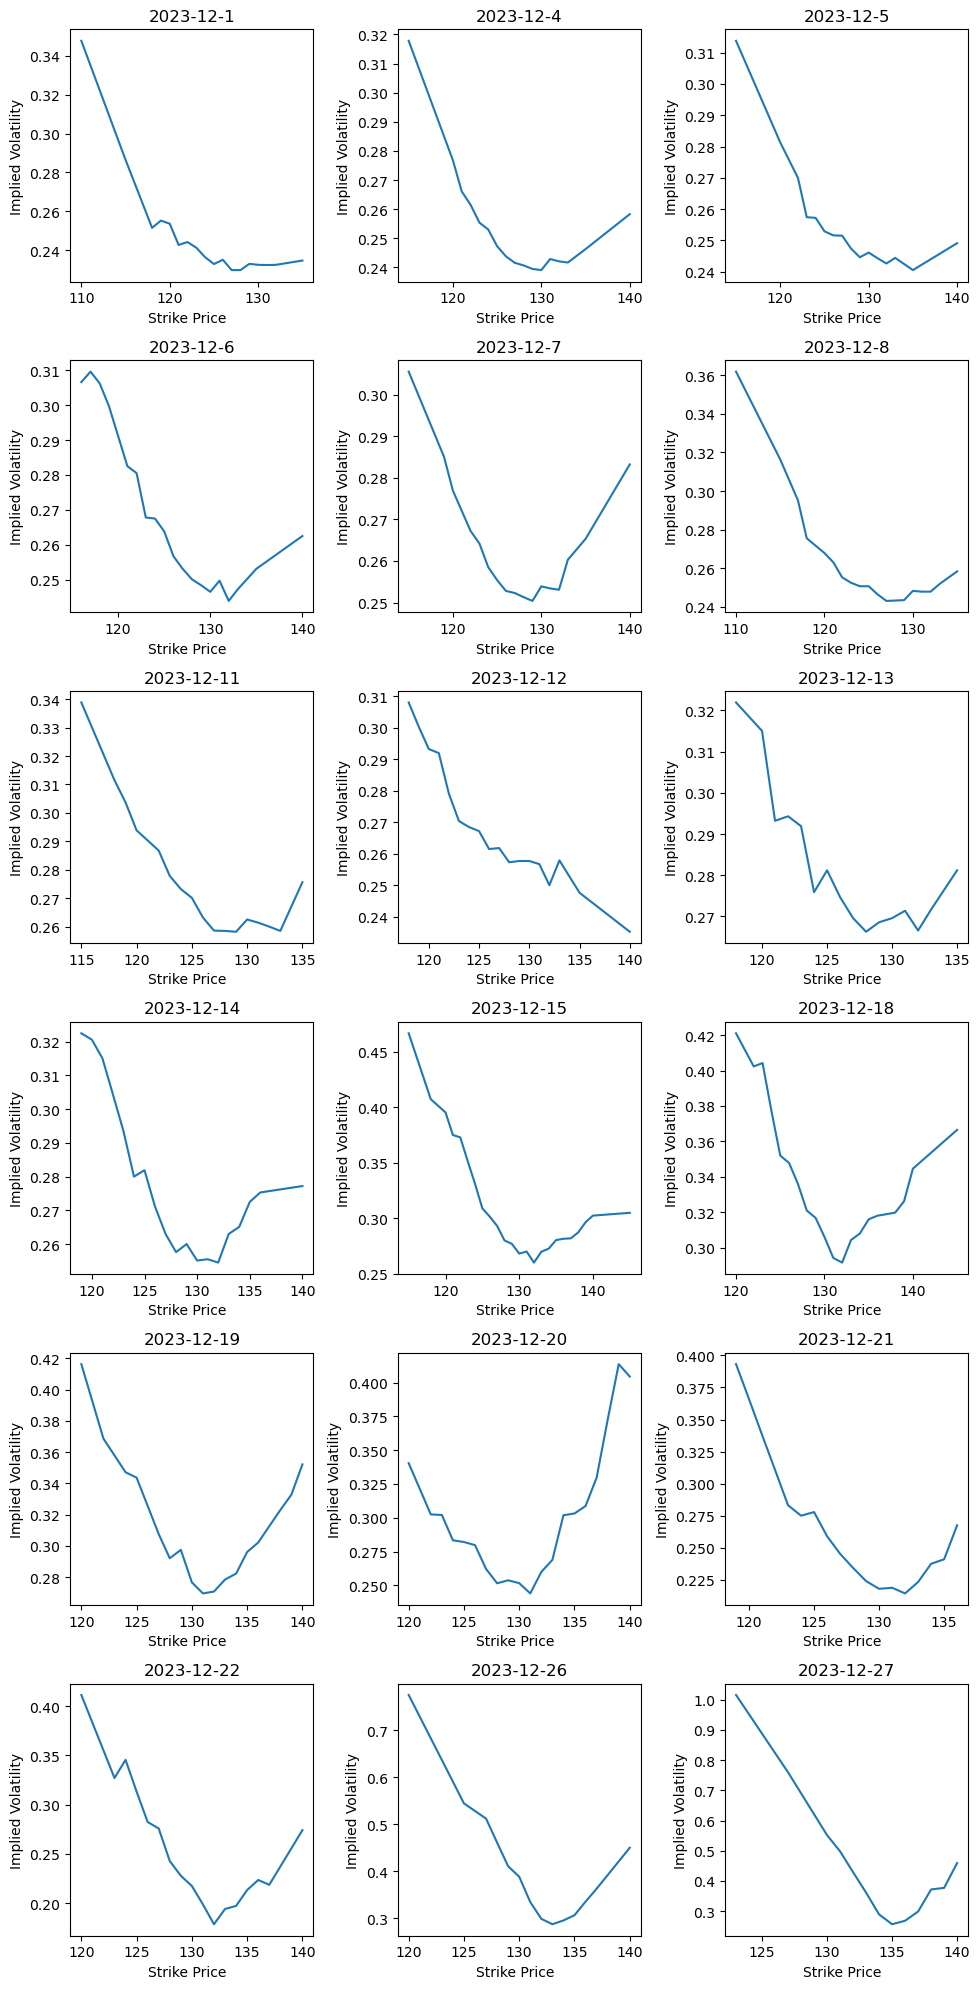

In [78]:
fig,axes = plt.subplots(nrows=6,ncols=3,figsize=(10,20))

a1 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-1')]
a2 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-4')]
a3 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-5')]
a4 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-6')]
a5 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-7')]
a6 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-8')]
a7 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-11')]
a8 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-12')]
a9 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-13')]
a10 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-14')]
a11 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-15')]
a12 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-18')]
a13 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-19')]
a14 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-20')]
a15 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-21')]
a16 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-22')]
a17 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-26')]
a18 = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == '2023-12-27')]

sns.lineplot(ax=axes[0,0],x=a1['Strike Price  '],y=a1['Implied Volatility'])
sns.lineplot(ax=axes[0,1],x=a2['Strike Price  '],y=a2['Implied Volatility'])
sns.lineplot(ax=axes[0,2],x=a3['Strike Price  '],y=a3['Implied Volatility'])
sns.lineplot(ax=axes[1,0],x=a4['Strike Price  '],y=a4['Implied Volatility'])
sns.lineplot(ax=axes[1,1],x=a5['Strike Price  '],y=a5['Implied Volatility'])
sns.lineplot(ax=axes[1,2],x=a6['Strike Price  '],y=a6['Implied Volatility'])
sns.lineplot(ax=axes[2,0],x=a7['Strike Price  '],y=a7['Implied Volatility'])
sns.lineplot(ax=axes[2,1],x=a8['Strike Price  '],y=a8['Implied Volatility'])
sns.lineplot(ax=axes[2,2],x=a9['Strike Price  '],y=a9['Implied Volatility'])
sns.lineplot(ax=axes[3,0],x=a10['Strike Price  '],y=a10['Implied Volatility'])
sns.lineplot(ax=axes[3,1],x=a11['Strike Price  '],y=a11['Implied Volatility'])
sns.lineplot(ax=axes[3,2],x=a12['Strike Price  '],y=a12['Implied Volatility'])
sns.lineplot(ax=axes[4,0],x=a13['Strike Price  '],y=a13['Implied Volatility'])
sns.lineplot(ax=axes[4,1],x=a14['Strike Price  '],y=a14['Implied Volatility'])
sns.lineplot(ax=axes[4,2],x=a15['Strike Price  '],y=a15['Implied Volatility'])
sns.lineplot(ax=axes[5,0],x=a16['Strike Price  '],y=a16['Implied Volatility'])
sns.lineplot(ax=axes[5,1],x=a17['Strike Price  '],y=a17['Implied Volatility'])
sns.lineplot(ax=axes[5,2],x=a18['Strike Price  '],y=a18['Implied Volatility'])

axes[0][0].set_title('2023-12-1')
axes[0][1].set_title('2023-12-4')
axes[0][2].set_title('2023-12-5')
axes[1][0].set_title('2023-12-6')
axes[1][1].set_title('2023-12-7')
axes[1][2].set_title('2023-12-8')
axes[2][0].set_title('2023-12-11')
axes[2][1].set_title('2023-12-12')
axes[2][2].set_title('2023-12-13')
axes[3][0].set_title('2023-12-14')
axes[3][1].set_title('2023-12-15')
axes[3][2].set_title('2023-12-18')
axes[4][0].set_title('2023-12-19')
axes[4][1].set_title('2023-12-20')
axes[4][2].set_title('2023-12-21')
axes[5][0].set_title('2023-12-22')
axes[5][1].set_title('2023-12-26')
axes[5][2].set_title('2023-12-27')


plt.tight_layout()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

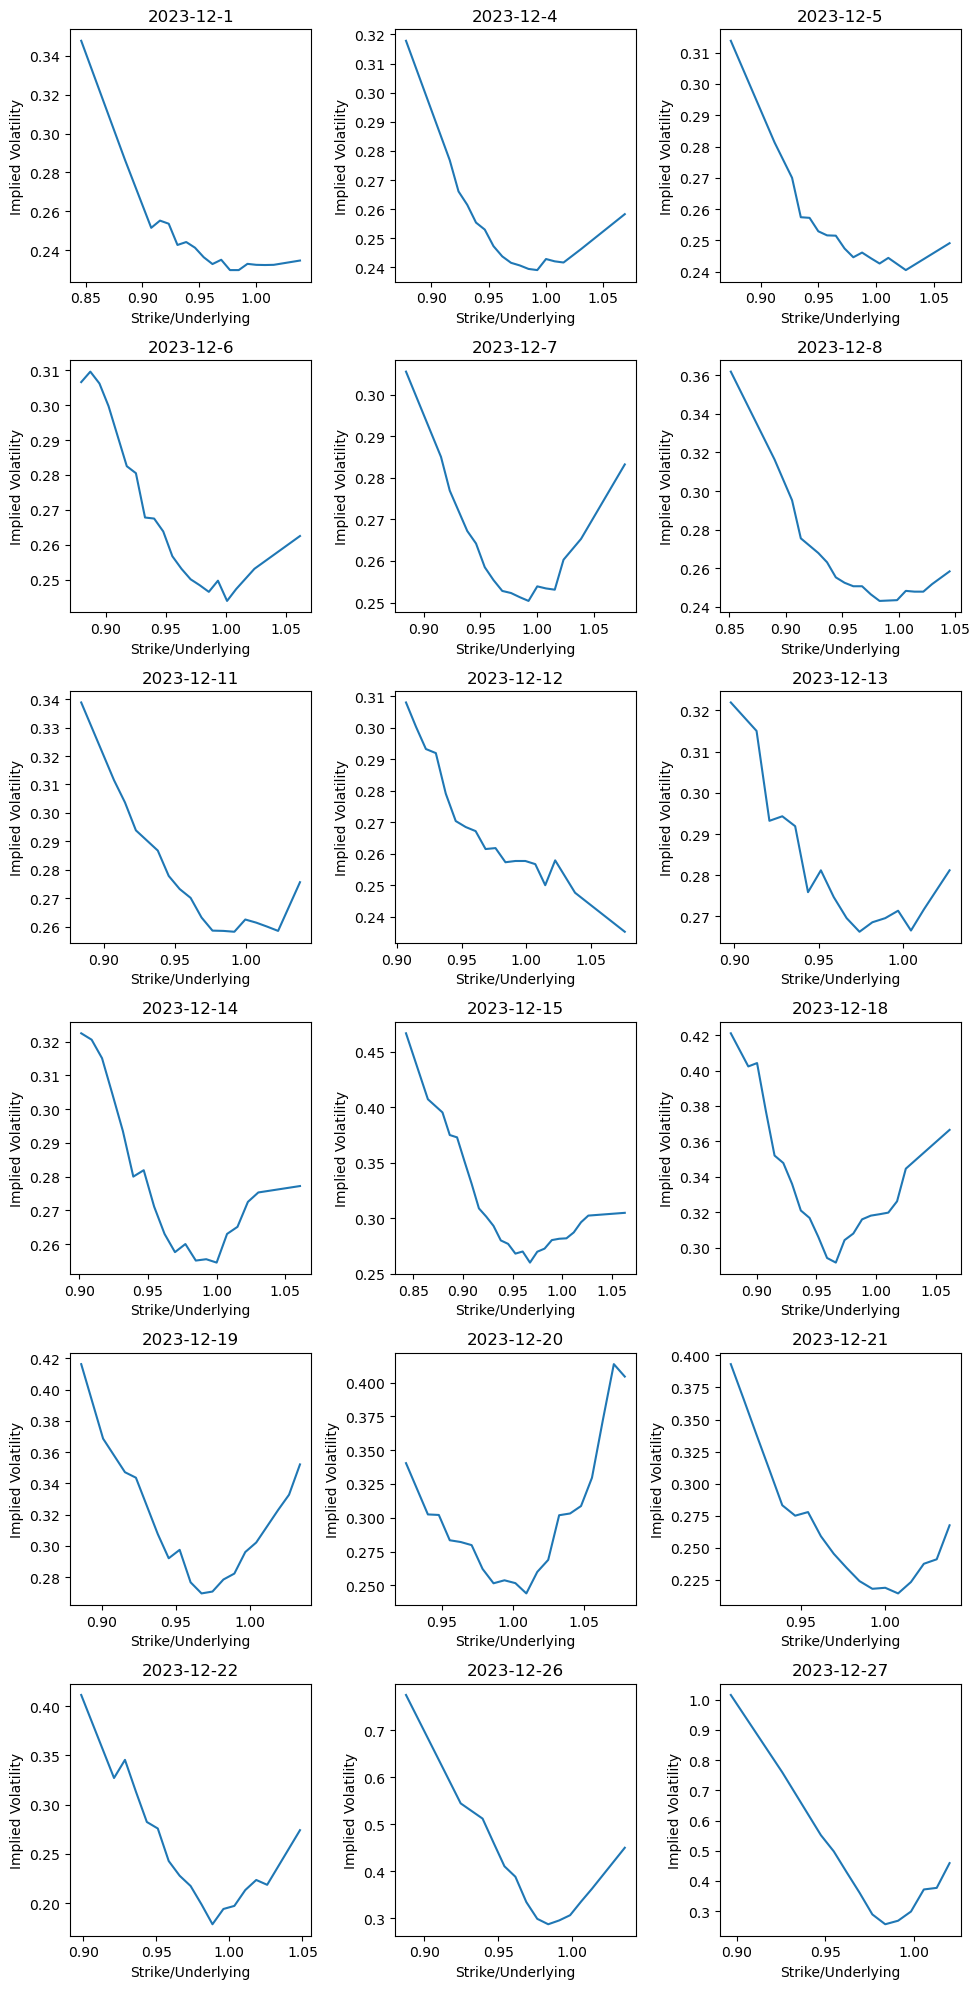

In [79]:
date = ['2023-12-1','2023-12-4','2023-12-5','2023-12-6','2023-12-7','2023-12-8','2023-12-11','2023-12-12','2023-12-13','2023-12-14','2023-12-15','2023-12-18','2023-12-19','2023-12-20','2023-12-21','2023-12-22','2023-12-26','2023-12-27']

fig,axes = plt.subplots(nrows=6,ncols=3,figsize=(10,20))

i=0
for ax in axes.flat:
    placeholder = df_put_combined[(df_put_combined['Implied Volatility']>0) & (df_put_combined['Date  '] == date[i])] 
    sns.lineplot(ax=ax,x=placeholder['Strike Price  ']/placeholder['Underlying Value  '],y=placeholder['Implied Volatility'])
    ax.set_xlabel('Strike/Underlying')
    ax.set_title(f'{date[i]}')
    i=i+1

plt.tight_layout()